# Flight Performance Analysis for an RV-8 Aircraft

## Required Software

* [Anaconda Python Distribution](https://www.continuum.io/downloads) (includes NumPy, Pandas, SciPy, Matplotlib, etc.)
* [Jupyter Notebook](http://jupyter.org/) (to display this document, included with Anaconda)
* [Seaborn Data Visualization](http://seaborn.pydata.org/) (for plotting aesthetics)
* [Scikit-Aero Python package](https://github.com/AeroPython/scikit-aero) (for standard atmosphere calculations)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skaero.atmosphere import coesa
%matplotlib inline

## Van's Aircraft RV-8 Specifications
Ref: https://www.vansaircraft.com/public/rv8specs.htm

In [2]:
# Wing span (ft)
b = 24

# Wing area (sq ft) 
S = 116

# Wing chord (constant, no taper)
c = S/b

# Aspect ratio
AR = b**2/S

# Gross weight (lbs)
W = 1800

# Wing loading (lb/sq ft)
WL = W/S

# Fuel capacity (US gal)
fuel_capacity = 42

# Engine rated power (hp)
W_dot = 180

# Oswald efficiency factor
    # (assumed from RV-6A data)
    # Ref: http://cafe.foundation/v2/pdf_cafe_apr/RV-6A%20Final%20APR.pdf
    # "assumed to be slightly better than the RV-6, due to the narrower fuselage with the same wing span"
e = 0.86

# Drag coefficient, parasite, zero-lift condition
    # (assumed from RV-6A data)
    # C_d_0 = 0.0211
C_d_0 = 0.0209 # Kevin Horton

## Thrust Required for Level Flight

In [3]:
# Free stream velocity (ft/s)
V = np.arange(100,380)

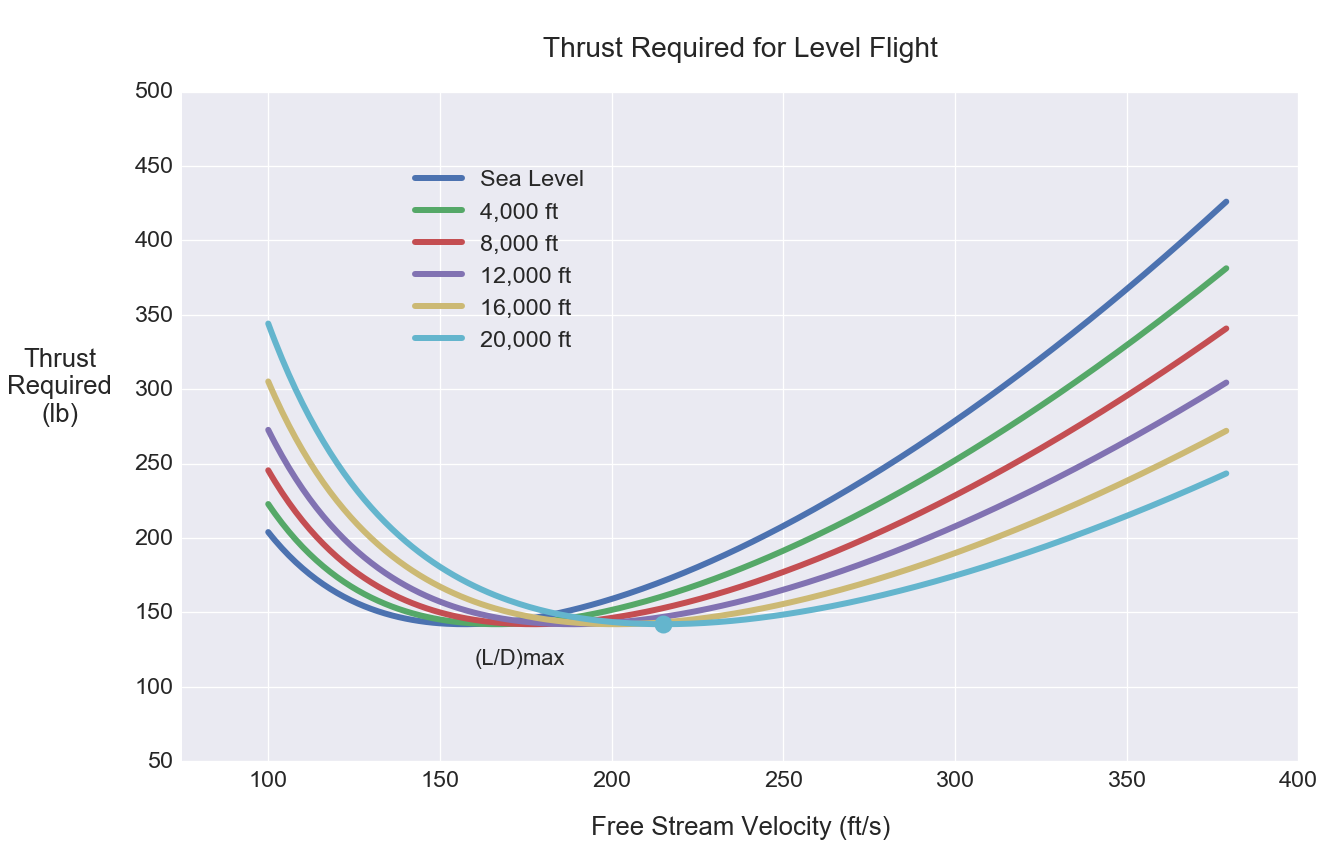

In [4]:
# Define seaborn plot style
sns.set_context("talk", font_scale=1.8, rc={"lines.linewidth": 6, "figure.figsize":(20,12)})

def plot_thrust_required(Max_Alt,V):
    """
    Plot thrust required curves for altitudes from sea level to Max_Alt in 4,000-ft increments.
    """
    legend = ['Sea Level']
    for alt in range(0,Max_Alt+1,4000):
        
        # Standard atmosphere, (SI units!!)
        # Altitute MSL (m), temp (C), press (Pa), density (kg/m^3)
        msl, T, p, rho = coesa.table(alt*0.3048)
        
        # Air density (slugs/ft^3)
        rho = rho * 0.00194032
        
        # Lift coefficient
        CL = W / (0.5 * rho * V**2 * S)
        
        # Drag coefficient
        CD = C_d_0 + CL**2 / (np.pi * e * AR)
        
        # Thrust required (lbs)
        Tr = W / (CL / CD)
        
        # Add a curve
        plt.plot(V,Tr)
        
        # Update the legend
        if alt > 0:
            legend.append("{:,.0f} ft".format(alt))
 
    # Locate the axis labels and limits
    ax = plt.gca()
    ax.set_xlim([75,400])
    ax.set_ylim([50,500])
    ax.xaxis.set_label_coords(0.5, -0.08)
    ax.yaxis.set_label_coords(-0.11, 0.5)
    ax.text(160, 115, '(L/D)max', size=22)
    
    # Add title and axis labels
    plt.legend(legend,loc=(0.2, 0.6))
    plt.title("\n Thrust Required for Level Flight \n")
    plt.ylabel('Thrust\nRequired\n(lb)', rotation=0)
    plt.xlabel('Free Stream Velocity (ft/s)')
    
    # Plot (L/D)max point
    plt.plot(V[np.argmin(Tr)], np.amin(Tr), marker='o', ms=18, color='#64b5cd')
    plt.show()

plot_thrust_required(20000,V)